In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import numpy as np
from collections import Counter
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import gensim
from gensim.models import CoherenceModel
from gensim import corpora
from pprint import pprint
import string
import os
import re

In [2]:
# Read the file into the dataframe
df = pd.read_csv('../data/by guide/cleaned_playstore_reviews.csv')

In [3]:
df.dtypes

Unnamed: 0                  int64
App                        object
Translated_Review          object
Sentiment                  object
Sentiment_Polarity        float64
Sentiment_Subjectivity    float64
dtype: object

In [4]:
df.head()

,Unnamed: 0,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,2,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
3,3,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
4,4,10 Best Foods for You,Best way,Positive,1.00,0.300000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29692 entries, 0 to 29691
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              29692 non-null  int64  
 1   App                     29692 non-null  object 
 2   Translated_Review       29692 non-null  object 
 3   Sentiment               29692 non-null  object 
 4   Sentiment_Polarity      29692 non-null  float64
 5   Sentiment_Subjectivity  29692 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 1.4+ MB


In [14]:
# Removal of unwanted characters from the tweet like @,#,links, mentions and RTs
def reviewCleaner(text):
    text = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",text).split())
    text = re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', '', text, flags=re.MULTILINE)
    return text

In [15]:
#Apply "reviewCleaner" over the data
df['Translated_Review'] = df['Translated_Review'].apply(reviewCleaner)

In [16]:
df.head()

,Unnamed: 0,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,0,10 Best Foods for You,I like eat delicious food That s I m cooking f...,Positive,1.00,0.533333
1,1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
3,4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
4,5,10 Best Foods for You,Best way,Positive,1.00,0.300000


In [17]:
#Count the values present in the Sentiment Column
df['Sentiment'].value_counts()

Positive    19015
Negative     6321
Neutral      4356
Name: Sentiment, dtype: int64

<AxesSubplot:title={'center':'Sentiment Graph'}>

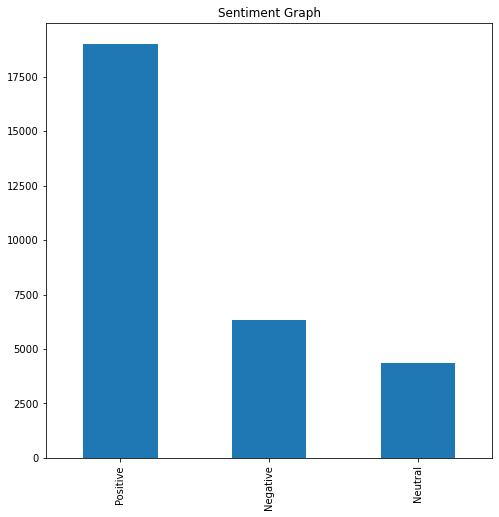

In [18]:
#Use bar chart to observe the frequencies of occerence of each of the three scores in the dataset
score_count = df['Sentiment'].value_counts()
score_count.plot(kind="bar", y="sentiment", title="Sentiment Graph", figsize=[8, 8])

<AxesSubplot:title={'center':'Senitment Pie Chart'}, ylabel='Sentiment'>

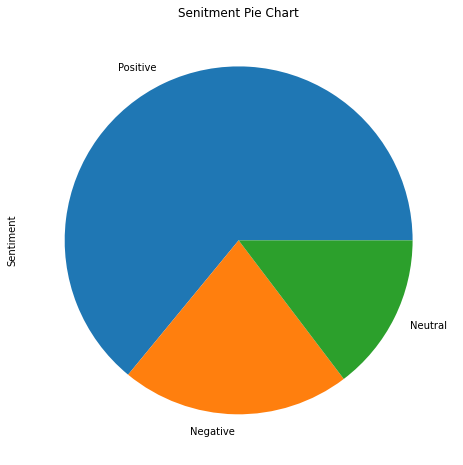

In [19]:
#Using pie chart to visualize the contribution of each of the scores in the data to the whole data
score_count.plot(kind="pie", y="Sentiment", title="Senitment Pie Chart", x="", figsize=[8, 8])

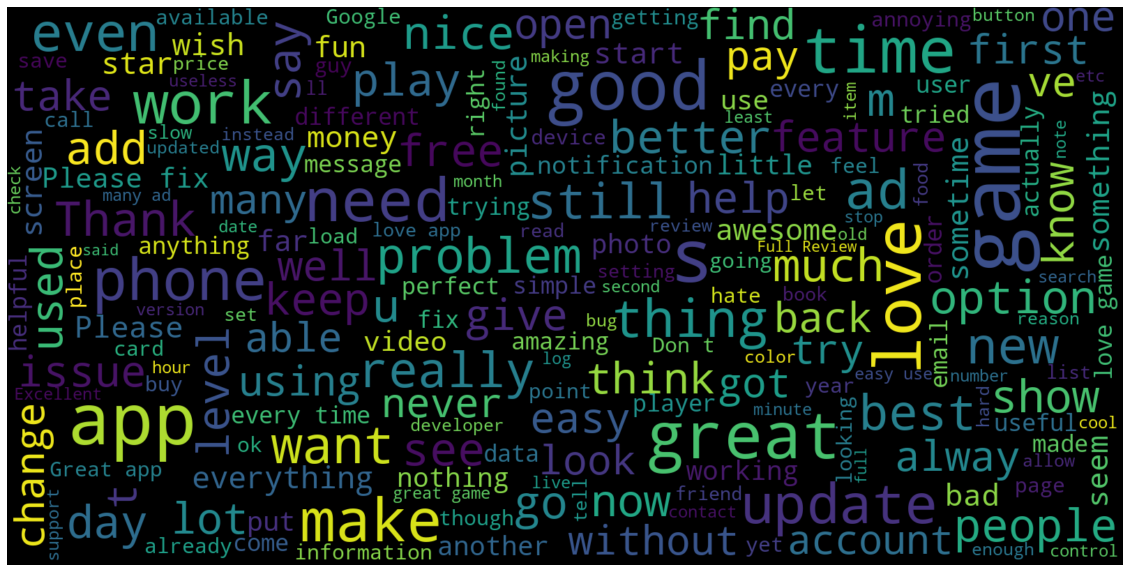

In [32]:
#Plot The Word cloud
allWords = ' '.join( [review for review in df['Translated_Review']] )
wordCloud = WordCloud(width = 1600, height = 800, random_state = 22, max_font_size = 119).generate(allWords)


plt.figure(figsize = (20, 15))
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')

plt.show()